
This is a binary classification problem using a credit card fraud detection dataset. This is a supervised machine learning problem with twenty-eight input variables and one output variable.
There are 492 fraudulant transactions of 284,807 transactions. 

The input variables are the principal components obtained via PCA and more information could not be provided in order to preserve the privacy of the customers. Time and transaction amound are the only variables not obtained via PCA. 

My usual route for a machine learning project is as follows: 
1. Pre-processing Data: Check size, descriptive stats, clean data, fill missing values, etc...
2. Data Visualizations
3.Feature Engineering
4. Create Training/Testing Datasets
5. Build and score models by trainning on the training dataset
6. Model prediction and scoring using test data

This might change because PCA has already been applied to the data thus data mining and data discovery techniques might not be worthwhile as we do have information regarding the importance of our variables. 



In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Data_Science/Data_Pool/creditcard.csv")

In [ ]:
print(dataset.shape)
dataset.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
(dataset.groupby(['Class'])).size()

Class
0    284315
1       492
dtype: int64

In [ ]:
(492/284315)*100

0.17304750013189596

In [ ]:
1-(492/284315)

0.998269524998681

As we can see, the fraud observations make up less than a quarter of a percent (or 0.17%) of the total observations in this dataset; there is a clear class imbalance. 

In determining the effectiveness of a model, the competitions rules advises against using a confusion matrix due to the class imbalance, and suggests using Area Under the Precision-Recall Curve. 



In [ ]:
array = dataset.values
data_inputs = array[:,:30]
data_output = array[:,30:]

In [ ]:
#Data Preparation 
from sklearn.model_selection import train_test_split
#Machine Learning Models 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Machine Learning Model Evaluation Tools 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


x_train, x_val, y_train, y_val = train_test_split(data_inputs, data_output, test_size=0.33, random_state=2)

models=[]
models.append(('LDA',LinearDiscriminantAnalysis(solver='svd', n_components=1,)))
models.append(('LogReg', LogisticRegression(solver='liblinear')))
models.append(('NB', GaussianNB()))
models.append(('DTrees', DecisionTreeClassifier()))

scoring = {'acc':'accuracy',
           'f1':'f1',
           'precision':'precision',
           'recall':'recall',
           'ROC_AUC_Score':'roc_auc'}


print("--------Training Metrics--------")
results=[]
for model_name,model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  #Random pulling without replacement 
  cv_results = cross_validate(model, x_train, y_train.ravel(), cv=kfold, scoring=scoring, return_train_score=True)
  results.append(cv_results)
  #cv_results_xg = cross_val_score(xgbc, x_train, y_train.ravel(), cv=kfold, scoring='f1_weighted')
  print("Model:{}".format(model_name))
  print("Accuracy: {:}", cv_results['test_acc'].mean(), cv_results['test_acc'].std())
  print("Recall:", cv_results['test_recall'].mean(), cv_results['test_recall'].std())
  print("Precision:", cv_results['test_precision']. mean(), cv_results['test_precision'].std())
  print("F1: ", cv_results['test_f1'].mean(), cv_results['test_f1'].std()) 
  print("ROC_AUC_Score:", cv_results['test_ROC_AUC_Score'].mean(), cv_results['test_ROC_AUC_Score'].mean())
  print()
  print()

print("---------Confusion Matrices---------")
for model_name, model in models: 
  model.fit(x_train, y_train)
  y_pred=model.predict(x_val)
  confus=confusion_matrix(y_pred,y_val.ravel())
  print(model_name,confus)

Metrics
LDA {'fit_time': array([1.77609086, 1.98787332, 1.08555341, 0.89978385, 0.8962791 ,
       0.90914512, 0.87596774, 0.91279507, 0.86611438, 0.90405321]), 'score_time': array([0.22980189, 0.15346384, 0.05660129, 0.05778742, 0.05777407,
       0.0591259 , 0.06578851, 0.06065392, 0.05681348, 0.06370282]), 'test_acc': array([0.99889949, 0.99931873, 0.99931873, 0.99926632, 0.99942354,
       0.99931873, 0.99947595, 0.99942354, 0.99947595, 0.99947595]), 'test_f1': array([0.68656716, 0.80597015, 0.80597015, 0.76666667, 0.83076923,
       0.80597015, 0.84375   , 0.83076923, 0.85294118, 0.84848485]), 'test_precision': array([0.6969697 , 0.81818182, 0.84375   , 0.92      , 0.9       ,
       0.84375   , 0.93103448, 0.9       , 0.87878788, 0.90322581]), 'test_recall': array([0.67647059, 0.79411765, 0.77142857, 0.65714286, 0.77142857,
       0.77142857, 0.77142857, 0.77142857, 0.82857143, 0.8       ]), 'test_ROC_AUC_Score': array([0.98146324, 0.98866023, 0.99822844, 0.96393583, 0.97065155,


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def metrics(models, x_train, y_train, x_val, y_val):
  for name, model in models:
    model.fit(x_train,y_train)
    actual=model.predict(x_val)
    predictions=y_val.ravel()
    accuracy=accuracy_score(actual, predictions)
    precision=precision_score(actual, predictions)
    recall=recall_score(actual, predictions)
    f1=f1_score(actual, predictions)
    roc_auc=roc_auc_score(actual, predictions)
    print("Model:", name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    print("ROC AUC Score", roc_auc)
    print()

    print()

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

XGBoost Clasification Model Below ***DO NOT TOUCH***

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree 

In [ ]:
('XGBoost', XGBClassifier(n_jobs=4, objective='binary:hinge'))

In [ ]:
("/content/drive/MyDrive/Data_Science/xgboost_fraud_model.json")

<Figure size 1440x720 with 0 Axes>

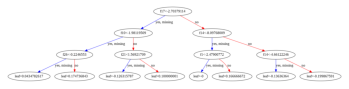

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(xgbc)
plt.show()